___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

In [78]:
import math
 
 
class GeoLocation:
    '''
    Class representing a coordinate on a sphere, most likely Earth.
    
    This class is based from the code smaple in this paper:
        http://janmatuschek.de/LatitudeLongitudeBoundingCoordinates
        
    The owner of that website, Jan Philip Matuschek, is the full owner of 
    his intellectual property. This class is simply a Python port of his very
    useful Java code. All code written by Jan Philip Matuschek and ported by me 
    (which is all of this class) is owned by Jan Philip Matuschek.
    '''
 
 
    MIN_LAT = math.radians(-90)
    MAX_LAT = math.radians(90)
    MIN_LON = math.radians(-180)
    MAX_LON = math.radians(180)
    
    EARTH_RADIUS = 6378.1  # kilometers
    
    
    @classmethod
    def from_degrees(cls, deg_lat, deg_lon):
        rad_lat = math.radians(deg_lat)
        rad_lon = math.radians(deg_lon)
        return GeoLocation(rad_lat, rad_lon, deg_lat, deg_lon)
        
    @classmethod
    def from_radians(cls, rad_lat, rad_lon):
        deg_lat = math.degrees(rad_lat)
        deg_lon = math.degrees(rad_lon)
        return GeoLocation(rad_lat, rad_lon, deg_lat, deg_lon)
    
    
    def __init__(
            self,
            rad_lat,
            rad_lon,
            deg_lat,
            deg_lon
    ):
        self.rad_lat = float(rad_lat)
        self.rad_lon = float(rad_lon)
        self.deg_lat = float(deg_lat)
        self.deg_lon = float(deg_lon)
        self._check_bounds()
        
    def __str__(self):
        degree_sign= u'\N{DEGREE SIGN}'
        return ("({0:.4f}deg, {1:.4f}deg) = ({2:.6f}rad, {3:.6f}rad)").format(
            self.deg_lat, self.deg_lon, self.rad_lat, self.rad_lon)
        
    def _check_bounds(self):
        if (self.rad_lat < GeoLocation.MIN_LAT 
                or self.rad_lat > GeoLocation.MAX_LAT 
                or self.rad_lon < GeoLocation.MIN_LON 
                or self.rad_lon > GeoLocation.MAX_LON):
            raise Exception("Illegal arguments")
            
    def distance_to(self, other, radius=EARTH_RADIUS):
        '''
        Computes the great circle distance between this GeoLocation instance
        and the other.
        '''
        return radius * math.acos(
                math.sin(self.rad_lat) * math.sin(other.rad_lat) +
                math.cos(self.rad_lat) * 
                math.cos(other.rad_lat) * 
                math.cos(self.rad_lon - other.rad_lon)
            )
            
    def bounding_locations(self, distance, radius=EARTH_RADIUS):
        '''
        Computes the bounding coordinates of all points on the surface
        of a sphere that has a great circle distance to the point represented
        by this GeoLocation instance that is less or equal to the distance argument.
        
        Param:
            distance - the distance from the point represented by this GeoLocation
                       instance. Must be measured in the same unit as the radius
                       argument (which is kilometers by default)
            
            radius   - the radius of the sphere. defaults to Earth's radius.
            
        Returns a list of two GeoLoations - the SW corner and the NE corner - that
        represents the bounding box.
        '''
        
        if radius < 0 or distance < 0:
            raise Exception("Illegal arguments")
            
        # angular distance in radians on a great circle
        rad_dist = distance / radius
        
        min_lat = self.rad_lat - rad_dist
        max_lat = self.rad_lat + rad_dist
        
        if min_lat > GeoLocation.MIN_LAT and max_lat < GeoLocation.MAX_LAT:
            delta_lon = math.asin(math.sin(rad_dist) / math.cos(self.rad_lat))
            
            min_lon = self.rad_lon - delta_lon
            if min_lon < GeoLocation.MIN_LON:
                min_lon += 2 * math.pi
                
            max_lon = self.rad_lon + delta_lon
            if max_lon > GeoLocation.MAX_LON:
                max_lon -= 2 * math.pi
        # a pole is within the distance
        else:
            min_lat = max(min_lat, GeoLocation.MIN_LAT)
            max_lat = min(max_lat, GeoLocation.MAX_LAT)
            min_lon = GeoLocation.MIN_LON
            max_lon = GeoLocation.MAX_LON
        
        return [ GeoLocation.from_radians(min_lat, min_lon) , 
            GeoLocation.from_radians(max_lat, max_lon) ]


            
if __name__ == '__main__':
 
    # Test bounding box
    loc = GeoLocation.from_degrees(22.0622221, -81.222253)
    distance = 100  # 1 kilometer
    SW_loc, NE_loc = loc.bounding_locations(distance)
    print (loc.distance_to(SW_loc))
    print (loc.distance_to(NE_loc))


141.64331076301565
141.1939643992886


# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [1]:
import numpy as np
import pandas as pd

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
8
import dask.dataframe as dd
 
filename = '311_Service_Requests.csv'
df = dd.read_csv(filename, dtype='str')
yelp = pd.read_csv('/Users/Faheem/Desktop/yelp.csv', low_memory=False)

** Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,stars,review_text,positive_review_counter_business
0,iCQpiavjjPzJ5_3gPD5Ebg,2,The pizza was okay. Not the best I've had. I p...,NaN
1,pomGBqfbxcqPv14c3XH-ZQ,5,I love this place! My fiance And I go here atl...,NaN
2,jtQARsP6P-LbkyjbO1qNGg,1,Terrible. Dry corn bread. Rib tips were all fa...,NaN
3,elqbBhBfElMNSrjFqW3now,2,Back in 2005-2007 this place was my FAVORITE t...,NaN
4,Ums3gaP2qM3W1XcA5r6SsQ,5,Delicious healthy food. The steak is amazing. ...,NaN


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658019 entries, 0 to 3658018
Data columns (total 4 columns):
business_id                         object
stars                               int64
review_text                         object
positive_review_counter_business    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 111.6+ MB


In [5]:
yelp.describe()

,stars,positive_review_counter_business
count,3.658019e+06,0.0
mean,3.714371e+00,NaN
std,1.365544e+00,NaN
min,0.000000e+00,NaN
25%,3.000000e+00,NaN
50%,4.000000e+00,NaN
75%,5.000000e+00,NaN
max,5.000000e+00,NaN


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

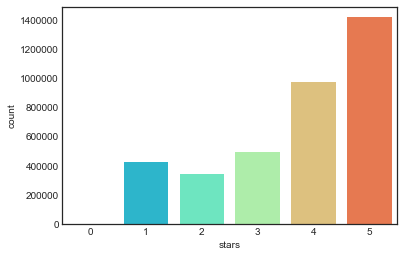

In [9]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [10]:
stars = yelp.groupby('stars').mean()
stars

,positive_review_counter_business
stars,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [11]:
stars.corr()

,positive_review_counter_business
positive_review_counter_business,NaN


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

In [12]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

ValueError: zero-size array to reduction operation minimum which has no identity

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [13]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [14]:
X = yelp_class['review_text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [16]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [20]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [21]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[118140   9443]
 [ 12079 413022]]


             precision    recall  f1-score   support

          1       0.91      0.93      0.92    127583
          5       0.98      0.97      0.97    425101

avg / total       0.96      0.96      0.96    552684



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [24]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [25]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [28]:
X = yelp_class['review_text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [29]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [30]:
predictions = pipeline.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[101759  25824]
 [  3035 422066]]
             precision    recall  f1-score   support

          1       0.97      0.80      0.88    127583
          5       0.94      0.99      0.97    425101

avg / total       0.95      0.95      0.95    552684



Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!